### 量化投资

量化投资是指通过数量化方式及计算机程序化发出买卖指令，以获取稳定收益为目的的交易方式。在海外的发展已有30多年的历史，其投资业绩稳定，市场规模和份额不断扩大、得到了越来越多投资者认可。从全球市场的参与主体来看，按照管理资产的规模，全球排名前四以及前六位中的五家资管机构，都是依靠计算机技术来开展投资决策，由量化及程序化交易所管理的资金规模在不断扩大。

它的基本理念是利用计算机技术结合一定的数字模型去实践投资者的思想和策略。

**特点**
- 量化投资可以克服人性的弱点，如贪婪、恐惧、侥幸心理，也可以克服认知偏差，使每一个决策都有理有据。
- 同时因为它具备强大的信息处理能力，可以帮你捕捉更多的投资机会。

![](https://n.sinaimg.cn/spider2020529/106/w580h326/20200529/f59d-iufmpmp0561662.jpg)

**美国顶级对冲基金的掌门人**

从左到右分别是量子基金的乔治·索罗斯（George Soros），文艺复兴的詹姆斯·西蒙斯（James Simons），保尔森基金的约翰·保尔森（John Paulson），先驱资本的菲利普·法尔科（Philip Falcone）和城堡投资的肯·格里芬（Ken Griffin）

这5位金融大鳄仍然活跃在投资一线，但在这次新冠危机中，他们业绩却有了明显的分化：索罗斯、保尔森和法尔科均遭受了不同程度的损失，但西蒙斯的旗舰基金Medallion今年回报高达29%，而格里芬的旗舰基金Wellington也基本没有亏损，顺利躲过股灾。

索罗斯、保尔森和法尔科均是擅长主动投资，而西蒙斯和格里芬则都是从事量化投资，在动荡的市场环境下，这是他们业绩分野的重要原因。

#### Quantitative Trading

1. 构建策略[（经典量化交易策略）](https://www.myquant.cn/docs/python_strategyies/153?)
2. 回测 (backtest: zipline, pyfolio, pybacktest...)
3. **[策略评估](#eva)** (empyrical...)
4. 策略优化

#### 工具
**talib**
>TA-Lib is widely used by trading software developers requiring to perform **technical analysis** of financial market data. 
> - Includes 150+ indicators such as ADX, MACD, RSI, Stochastic, Bollinger Bands, etc. 
> - Candlestick pattern recognition 
> - Open-source API for C/C++, Java, Perl, Python and 100% Managed .NET 
- 安装：pip install ta-lib
- [官方文档](https://mrjbq7.github.io/ta-lib/)

**empyrical**

- 安装：pip install empyrical
- [官方文档](http://quantopian.github.io/empyrical/appendix.html)

#### 参考资料
- 《量化投资》欧内斯特·陈
- https://www.investopedia.com/

#### Example

随机从上市公司的股票列表中获取n个股票的数据，并将每支股票的数据以字典的格式保存在列表中：

In [3]:
## 获取数据
import tushare as ts
import numpy as np
import pandas as pd

tushare_token = '1c8b06446534ae510c8c68e38fc248b99f89ac3814cb55645ae2be72'  # 请在 tushare.pro 网站注册并且告知学生身份，可以取得你的token
pro = ts.pro_api(tushare_token)

In [4]:
def collect_stock_data_pro(code, start_date, end_date):
    try:
        stock_data = pro.daily(ts_code = code, start_date =start_date , end_date = end_date) # 获取日行情数据
        
        return stock_data
    except:
        print('Stock '+code+' could not collect from Tushare Pro')

In [5]:
def random_pick_stocks_code_pro(n): 
    # 查询当前所有正常上市交易的股票列表
    stock_list = pro.stock_basic(exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')
    # 随机从上述列表中选出n个股票并返回股票代码
    ind = [x[0] for x in list(np.random.randint(low = 0, high = len(stock_list), size = (n, 1)))]
    return list(stock_list.iloc[ind]['ts_code'])


In [6]:
start_date='20170701'
end_date='20200730'
n = 1 # number of stocks you wanna collect from Tushare

codes = random_pick_stocks_code_pro(n)
stock_list = []
for c in codes:
    stock_info = {}
    stock_info['code'] =  c
    stock_info['data'] = collect_stock_data_pro(c, start_date, end_date)
    stock_list.append(stock_info)

In [7]:
stock_list

[{'code': '300649.SZ',
  'data':        ts_code trade_date   open   high    low  close  pre_close  change  \
  0    300649.SZ   20200730  18.57  18.64  18.29  18.35      18.47   -0.12   
  1    300649.SZ   20200729  18.06  18.55  17.95  18.47      18.16    0.31   
  2    300649.SZ   20200728  17.98  18.48  17.98  18.16      17.95    0.21   
  3    300649.SZ   20200727  18.40  18.40  17.77  17.95      18.15   -0.20   
  4    300649.SZ   20200724  18.70  19.30  18.08  18.15      18.70   -0.55   
  ..         ...        ...    ...    ...    ...    ...        ...     ...   
  741  300649.SZ   20170707  49.40  52.00  49.20  50.09      49.53    0.56   
  742  300649.SZ   20170706  50.31  51.30  49.10  49.53      50.81   -1.28   
  743  300649.SZ   20170705  50.71  51.00  49.20  50.81      50.70    0.11   
  744  300649.SZ   20170704  49.00  52.48  49.00  50.70      48.21    2.49   
  745  300649.SZ   20170703  48.10  48.66  47.50  48.21      47.49    0.72   
  
       pct_chg       vol      

In [29]:
sdata = stock_list[0]['data'].iloc[::-1,:].set_index('trade_date')
sdata

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
20170703,300649.SZ,48.10,48.66,47.50,48.21,47.49,0.72,1.5200,21616.36,104168.068
20170704,300649.SZ,49.00,52.48,49.00,50.70,48.21,2.49,5.1600,45717.12,230817.461
20170705,300649.SZ,50.71,51.00,49.20,50.81,50.70,0.11,0.2200,35844.35,179737.109
20170706,300649.SZ,50.31,51.30,49.10,49.53,50.81,-1.28,-2.5200,29507.00,147507.403
20170707,300649.SZ,49.40,52.00,49.20,50.09,49.53,0.56,1.1300,37305.01,189344.612
...,...,...,...,...,...,...,...,...,...,...
20200724,300649.SZ,18.70,19.30,18.08,18.15,18.70,-0.55,-2.9412,15674.00,29322.706
20200727,300649.SZ,18.40,18.40,17.77,17.95,18.15,-0.20,-1.1019,8824.50,15890.147
20200728,300649.SZ,17.98,18.48,17.98,18.16,17.95,0.21,1.1699,5161.16,9390.072


In [30]:
sindex = pro.index_daily(ts_code='000300.SH', start_date = start_date, end_date = end_date).iloc[::-1,:].set_index('trade_date')
sindex

,ts_code,close,open,high,low,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
20170703,000300.SH,3650.8463,3667.2316,3667.5957,3633.7825,3666.7977,-15.9514,-0.4350,88820860.0,1.152147e+08
20170704,000300.SH,3619.9841,3646.8280,3646.8455,3611.6911,3650.8463,-30.8622,-0.8453,95071413.0,1.253504e+08
20170705,000300.SH,3659.6795,3611.8984,3660.7291,3610.4586,3619.9841,39.6954,1.0966,88232425.0,1.203516e+08
20170706,000300.SH,3660.0967,3654.5576,3666.7745,3629.5600,3659.6795,0.4172,0.0114,102379245.0,1.328371e+08
20170707,000300.SH,3655.9293,3647.6416,3657.1131,3631.8702,3660.0967,-4.1674,-0.1139,103735497.0,1.234654e+08
...,...,...,...,...,...,...,...,...,...,...
20200724,000300.SH,4505.5906,4679.0273,4691.6980,4479.3928,4712.4357,-206.8451,-4.3893,243905203.0,4.377267e+08
20200727,000300.SH,4528.4500,4535.0053,4558.1189,4482.4408,4505.5906,22.8594,0.5074,171420551.0,3.018934e+08
20200728,000300.SH,4568.2576,4567.6691,4590.2496,4537.6849,4528.4500,39.8076,0.8791,162768498.0,2.928358e+08


In [42]:
# 连接上述两个dataframe
data = pd.concat([sdata,sindex], axis=1, join='inner')['close']
data.columns = ['stock','csi300']
data

,stock,csi300
trade_date,,
20170703,48.21,3650.8463
20170704,50.70,3619.9841
20170705,50.81,3659.6795
20170706,49.53,3660.0967
20170707,50.09,3655.9293
...,...,...
20200724,18.15,4505.5906
20200727,17.95,4528.4500
20200728,18.16,4568.2576


<AxesSubplot:xlabel='trade_date'>

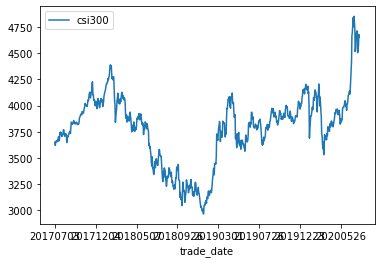

In [100]:
data[['csi300']].plot()

<div id='eva'></div>

#### Strategy Evaluation
- Returns (累计收益率，基准累计收益率，年化收益率，基准年化收益率)
- Ratios ([夏普比率](#sr)，[信息比率](#ir)，[索提诺比率](#stnr))
- Risks ([最大回撤](#mdd)，[alpha](#alpha)，[beta](#beta))

**Total Returns（策略累计收益率）**

$Total Return = (P_{end}-P_{start})/P_{start} * 100\% $

**Total Annualized Returns（策略年化收益率）**

$Total Annualized Return = (P_{end}/P_{start})^{250/n}-1$

n = 策略执行天数

**Benchmark Returns（基准累计收益率）**

$Total Return = (B_{end}-B_{start})/B_{start} * 100\% $

**Benchmark Annualized Returns（基准年化收益率）**

$Total Annualized Return = (M_{end}/M_{start})^{250/n}-1$

n = 策略执行天数

In [68]:
totalR = (data['stock'][-1]-data['stock'][0])/data['stock'][0]
round(totalR,4)

-0.6194

In [69]:
totalAR = (data['stock'][-1]/data['stock'][0])**(250/len(data))-1
round(totalAR,4)

-0.2765

In [70]:
totalR = (data['csi300'][-1]-data['csi300'][0])/data['csi300'][0]
round(totalR,4)

0.2754

In [71]:
totalAR = (data['csi300'][-1]/data['csi300'][0])**(250/len(data))-1
round(totalAR,4)

0.0849

<div id = 'sr'></div>

**Sharpe Ratio**

    夏普比率是由诺贝尔奖获得者威廉·夏普（William F. Sharpe）开发的，用于帮助投资者了解投资收益与风险之间的关系。该比率指的是超过无风险利率的平均回报率相对于每单位波动率的值。波动率是衡量资产或投资组合价格波动的指标。

    从平均收益中减去无风险利率，可使投资者更好地隔离与冒险活动相关的利润。无风险收益率是指风险为零的投资收益，就是投资者不承担任何风险所期望的收益。例如，美国国债的收益率可以用作无风险利率。

    通常，夏普比率的值越大，风险调整后的回报越有吸引力。
    
***Formula and Calculation of Sharpe Ratio***
$$ \textit{Sharpe Ratio} = \frac{R_p - r_f}{\sigma_p} $$
$R_p$ = 策略收益率  
$R_f$ = 无风险收益率  
$\sigma_p$ = 策略收益率的标准差


<div id = 'ir'></div>

**Information Ratio**

The information ratio in finance is one of the most important ratios in **active management**. The appraisal ratio measures the level of outperformance of an active strategy over the benchmark. 

***IR Formula and Calculation***
$${IR} = \frac{R_p-R_b}{std(R_p-R_b)}$$

where $R_p$ is the strategy return and $R_b$ is the benchmark return, and the $std(R_p-R_b)$ could be interpreted as the **tracking error**. The difference between both is the **active return**. As such, the IR is equal to the expected active return divided by the tracking error. In other words, the ratio measures the active return of the investor's strategy divided by the amount of risk that it takes relative the the benchmark. 

***Key Concept***

1. The information ratio is a measurement of portfolio returns above the returns of a benchmark. 
2. The information ratio is used to evaluate the skill of a portfolio manager at generating returns in excess of a given benchmark.
3. A higher (0.3 - 0.4 would be fairly good) IR result implies a better portfolio manager who's achieving a higher return in excess of the benchmark, given the risk taken


In [87]:
# calculate daily stock returns
data['stock_return'] = data['stock'].pct_change()

# calculate daily benchmark returns
data['benchmark_return'] = data['csi300'].pct_change()

# calculate the difference of daily returns between stock and benchmark
data['excess_return'] = data['stock_return']-data['benchmark_return']

# calculate the information ratio and sharpe Ratio
rf=0.00
rf_daily = (1+rf)**(1/250)-1
ir = data['excess_return'].mean()/data['excess_return'].std()
sr = (data['stock_return'].mean()-rf_daily)/data['stock_return'].std()
print('The information ratio is {}, the sharpe ratio is {}'.format(round(ir,4), round(sr,4)))

The information ratio is -0.029, the sharpe ratio is -0.0157


**Exercise：**

    计算年化的夏普比率。

<div id = 'stnr'></div>

**Sortino Ratio**

    Sortino比率是Sharpe比率的一种变体，它通过使用投资组合负收益的标准偏差（downside risk）而不是投资组合收益的总标准偏差来将下行波动率与总体波动率区分开来。Sortino比率采用资产或投资组合的收益减去无风险利率，然后将该金额除以资产的下行波动率。该比率以Frank A. Sortino的名字命名。

***Formula and Calculation of Sortino Ratio***
$$Sortino Ratio = \frac{R_p-r_f}{\sigma_d}$$
$R_p$ = 策略收益率  
$r_f$ = 无风险收益率  
$\sigma_d$ = 下行风险的标准偏差(downside risk) = $$\sqrt{\frac{1}{n}\sum^n_{i=1}(D_{pi}-\bar{D}_{pi})^2H_i}$$  
n = 策略执行天数  
$D_{pi}$ = 策略在第i日的收益率  
$\bar{D}_{pi}$ = 策略执行到第i日的平均收益率 = $\frac{1}{i}\sum^i_{j=1}D_j$  
$H_i = 1$ when $D_{pi}<\bar{D}_{pi}$, $H_i = 0$ when $D_{pi}>\bar{D}_{pi}$

***Key concepts***
- Sortino比率与Sharpe比率的不同之处在于，它仅考虑下行风险的标准偏差，而不是整个（上行+下行）风险的标准偏差。
- 由于Sortino比率仅着重于投资组合收益与均值的负偏差，因此可以更好地了解投资组合的风险调整绩效。
- Sortino比率是投资者，分析师和投资组合经理评估给定风险水平下投资收益的一种有用方法。

In [95]:
import empyrical

returns = data['stock_return']
stn_ratio = empyrical.sortino_ratio(returns, required_return=0, period='daily', annualization=None)
ds_risk = empyrical.downside_risk(returns, required_return=0, period='daily', annualization=None)

print('The sortino ratio is {}, the downside risk is {}'.format(round(stn_ratio,4), round(ds_risk,4)))

The sortino ratio is -0.3163, the downside risk is 0.4467


<div id = 'mdd'></div>

**Maximum drawdown**

> 什么是回撤?  
    A drawdown is a **peak-to-trough decline during a specific period** for an investment, trading account, or fund. A drawdown is usually quoted as the percentage between the peak and the subsequent trough. 

***Key Concepts*** 
- 回撤是指投资或交易帐户在恢复到峰值之前从峰值下降了多少。
- 回撤通常以百分比表示。
- 回撤是下行风险(downside risk)的度量。
- 在评估回撤时，还应考虑恢复回撤所花费的时间。
- 回撤(drawdown)和亏损(loss)的区别：大多数交易者将回撤视为峰谷指标，而亏损通常是指当前价格或终止价格相对于购买价格的比率。

> 什么是最大回撤（MDD）？  
    最大回撤（MDD）是指在达到新的峰值之前，从投资组合的最高点到最低点所观察到的最大损失。最大回撤是在指定时间段内下行风险的指标。
    
$$MDD = \frac{(trough\ value − peak\ value)}{peak\ value}$$

- Maximum drawdown (MDD) is a measure of an asset's largest price drop from a peak to a trough.
- Maximum drawdown is considered to be an indicator of downside risk, with large MDDs suggesting that down movements could be volatile.
- While MDD measures the largest loss, it does not account for the frequency of losses, not the size of any gains.

<AxesSubplot:xlabel='trade_date'>

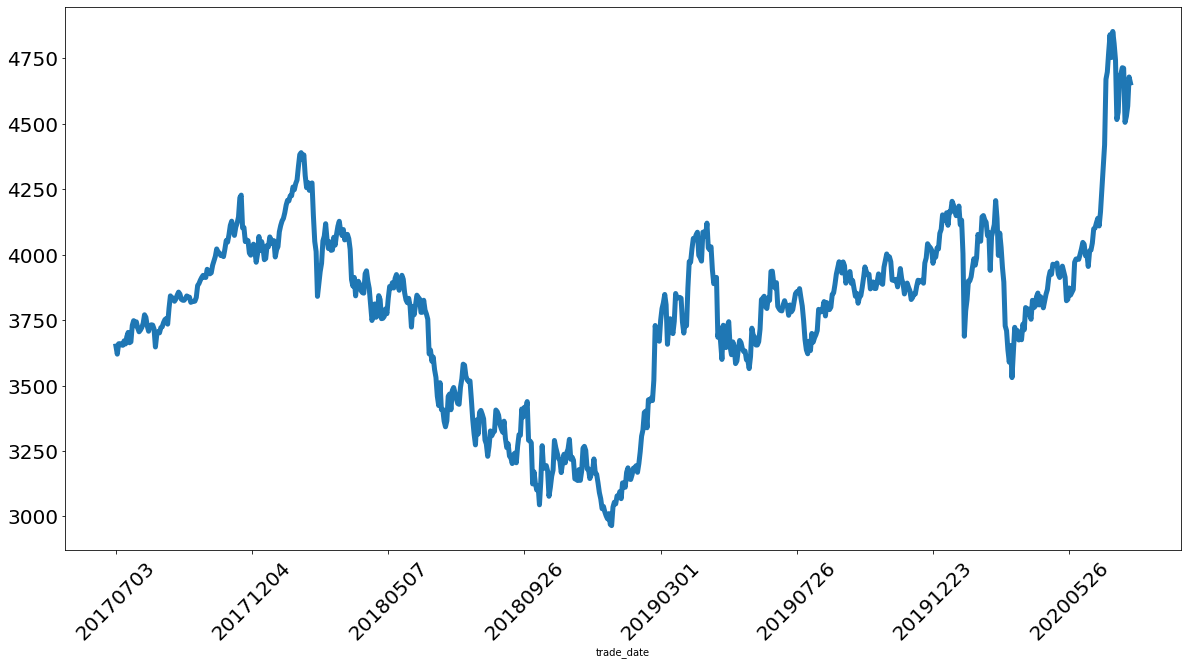

In [101]:
data['csi300'].plot(figsize=(20,10), linewidth=5, fontsize=20, rot = 45)

##### 生成当日之前历史最高值的序列
```
DataFrame.expanding().max()
np.maximum.accumulate()
```

<AxesSubplot:>

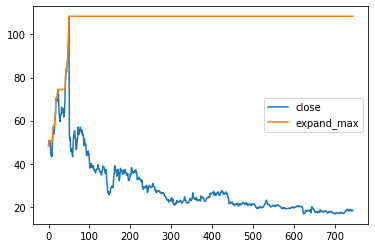

In [148]:
st = stock_list[0]['data'].iloc[::-1,:][['trade_date', 'close']].reset_index(drop=True)
st['expand_max']=st['close'].expanding().max()
st[['close','expand_max']].plot()

In [ ]:
end_idx = st['close'].sub(st['close'].expanding().max()).idxmin()
end_day = st['trade_date'].loc[end_idx]
start_day = st['trade_date'].loc[st.loc[:end_idx,:].close.idxmax()]
mdd = st['close'].sub(st['close'].expanding().max()).div(st['close'].expanding().max()).min()

print('Max drawdown is {}, start from {} and end with {}.'.format(mdd, start_day, end_day))

**Exercise：**

1. 补全上述代码
2. 请在不使用第三方库的情况下编写代码，计算data['stock']的sortino ratio。

<div id = 'alpha'></div>

**Alpha**

表示在投资中面临的非系统性风险。Alpha是投资者获得的与市场波动无关的回报，一般用来度量投资者的投资技能，比如投资者获得了12%的回报，其基准获得了10%的回报，那么Alpha或者价值增值的部分就是2%。公式为：

$$\alpha = R_p-[r_f+\beta_p \cdot (R_b-r_f)]$$

$R_p$ = 策略收益率  
$r_f$ = 无风险收益率  
$\beta_p$ = 策略beta  
$R_b$ = 基准收益率  

<div id = 'beta'></div>

**Beta**

表示在投资中面临的系统性风险，反映了策略对大盘变化的敏感性。例如，一个策略的Beta为1.3，则在大盘涨1%时，策略就可能涨1.3%，反之亦然。如果一个策略的Beta为-1.3，则在大盘涨1%时，策略就可能跌1.3%，反之亦然。公式为：

$$\beta_p = \frac{cov(D_p, D_b)}{var(D_b)}$$

$D_p$ = 策略每日收益率的时间序列  
$D_b$ = 基准每日收益率的时间序列

**Exercise：**

请根据上述两个公式，计算收益序列data['stock_return']的alpha和beta（基准为data['index_return']）。

### 海龟交易策略

TaLib是一个Python金融指数处理库。包含了很多技术分析里的常用参数指标，例如MA、SMA、WMA、MACD、ATR等。

趋势追踪——唐奇安通道

海龟交易法则利用唐奇安通道的突破点作为买卖信号指导交易，简单而言唐奇安通道是由一条上轨线、中线和下线组成，上轨线由N1日内最高价构成，下轨线由N2日内最低价计算，当价格冲破上轨是可能的买入信号，反之，冲破下轨时是可能的卖出信号。

海龟交易法则的策略思路：

- 入场条件：当收盘价突破20日价格高点时，买入一单元股票；

- 加仓条件：当价格大于上一次买入价格的0.5个ATR（平均波幅），买入一单元股票，加仓次数不超过3次；

- 止损条件：当价格小于上一次买入价格的2个ATR时清仓；

- 离场条件：当价格跌破10日价格低点时清仓。

**Exercise：**
    通过阅读下面的代码，理解：
    1. 如何设置交易信号
    2. 如何计算策略的净值曲线

In [15]:
import pandas as pd  
import numpy as np
import talib as ta
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
%matplotlib inline   
#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

#使用tushare获取交易数据
#设置token
import tushare as ts 
#注意token更换为你在tushare网站上获取的
token='1c8b06446534ae510c8c68e38fc248b99f89ac3814cb55645ae2be72' 
pro=ts.pro_api(token)
index={'上证综指': '000001.SH',
        '深证成指': '399001.SZ',
        '沪深300': '000300.SH',
        '创业板指': '399006.SZ',
        '上证50': '000016.SH',
        '中证500': '000905.SH',
        '中小板指': '399005.SZ',
        '上证180': '000010.SH'}
#获取当前交易的股票代码和名称
def get_code():
    df = pro.stock_basic(exchange='', list_status='L')
    codes=df.ts_code.values
    names=df.name.values
    stock=dict(zip(names,codes))
    #合并指数和个股成一个字典
    stocks=dict(stock,**index)
    return stocks    
#获取行情数据
def get_daily_data(stock,start,end):
    #如果代码在字典index里，则取的是指数数据
    code=get_code()[stock]
    if code in index.values():
        df=pro.index_daily(ts_code=code,start_date=start, end_date=end)
    #否则取的是个股数据
    else:
        df=pro.daily(ts_code=code, adj='qfq',start_date=start, end_date=end)
    #将交易日期设置为索引值
    df.index=pd.to_datetime(df.trade_date)
    df=df.sort_index()
    #计算收益率
    df['ret']=df.close/df.close.shift(1)-1
    return df

In [16]:
hs=get_daily_data('沪深300','20180101','')[['close','open','high','low','vol']]
#最近 20 个交易日最高价
hs['up']=ta.MAX(hs.high,timeperiod=20).shift(1)
#最近 10 个交易日最低价
hs['down']=ta.MIN(hs.low,timeperiod=10).shift(1)
#ATR指标：Average True Range 真实波动幅度的移动平均值
hs['ATR']=ta.ATR(hs.high,hs.low,hs.close,timeperiod=20)
hs.tail()

,close,open,high,low,vol,up,down,ATR
trade_date,,,,,,,,
2020-12-07,5022.2351,5065.7285,5067.8698,5014.6090,139896217.0,5090.6084,4867.8153,65.978991
2020-12-08,5009.8786,5029.1063,5043.0605,4998.9218,123073029.0,5090.6084,4867.8153,64.886976
2020-12-09,4942.6986,5022.3846,5033.6417,4942.5195,138916965.0,5090.6084,4867.8153,66.198737
2020-12-10,4940.5249,4931.2933,4962.7433,4919.7696,125914270.0,5090.6084,4867.8153,65.037485
2020-12-11,4889.6292,4957.8236,4957.8236,4849.3547,159357697.0,5090.6084,4917.3479,67.209056


In [17]:
#关掉pandas的warnings
pd.options.mode.chained_assignment = None
def strategy(stock,start,end,N1=20,N2=10):
    df=get_daily_data(stock,start,end)
    #最近N1个交易日最高价
    df['H_N1']=ta.MAX(df.high,timeperiod=N1)
    #最近N2个交易日最低价
    df['L_N2']=ta.MIN(df.low,timeperiod=N2)
    #当日收盘价>昨天最近N1个交易日最高点时发出信号设置为1
    buy_index=df[df.close>df['H_N1'].shift(1)].index
    df.loc[buy_index,'收盘信号']=1
    #将当日收盘价<昨天最近N2个交易日的最低点时收盘信号设置为0
    sell_index=df[df.close<df['L_N2'].shift(1)].index
    df.loc[sell_index,'收盘信号']=0
    df['当天仓位']=df['收盘信号'].shift(1)
    df['当天仓位'].fillna(method='ffill',inplace=True)
    d=df[df['当天仓位']==1].index[0]-timedelta(days=1)
    df1=df.loc[d:].copy()
    df1['ret'][0]=0
    df1['当天仓位'][0]=0
    #当仓位为1时，买入持仓，当仓位为0时，空仓，计算资金净值
    df1['策略净值']=(df1.ret.values*df1['当天仓位'].values+1.0).cumprod()
    df1['指数净值']=(df1.ret.values+1.0).cumprod()
    df1['策略收益率']=df1['策略净值']/df1['策略净值'].shift(1)-1
    df1['指数收益率']=df1.ret
    total_ret=df1[['策略净值','指数净值']].iloc[-1]-1
    annual_ret=pow(1+total_ret,250/len(df1))-1
    dd=(df1[['策略净值','指数净值']].cummax()-df1[['策略净值','指数净值']])/df1[['策略净值','指数净值']].cummax()
    d=dd.max()
    beta=df1[['策略收益率','指数收益率']].cov().iat[0,1]/df1['指数收益率'].var()
    alpha=(annual_ret['策略净值']-annual_ret['指数净值']*beta)
    exReturn=df1['策略收益率']-0.03/250
    sharper_atio=np.sqrt(len(exReturn))*exReturn.mean()/exReturn.std()
    TA1=round(total_ret['策略净值']*100,2)
    TA2=round(total_ret['指数净值']*100,2)
    AR1=round(annual_ret['策略净值']*100,2)
    AR2=round(annual_ret['指数净值']*100,2)
    MD1=round(d['策略净值']*100,2)
    MD2=round(d['指数净值']*100,2)
    S=round(sharper_atio,2)
    df1[['策略净值','指数净值']].plot(figsize=(15,7))
    plt.title('海龟交易策略简单回测',size=15)
    bbox = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
    plt.text(df1.index[int(len(df1)/5)], df1['指数净值'].max()/1.5, f'累计收益率：\
策略{TA1}%，指数{TA2}%;\n年化收益率：策略{AR1}%，指数{AR2}%；\n最大回撤：  策略{MD1}%，指数{MD2}%;\n\
策略alpha: {round(alpha,2)}，策略beta：{round(beta,2)}; \n夏普比率：  {S}',size=13,bbox=bbox)  
    plt.xlabel('')
    ax=plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.show()
    #return df1.loc[:,['close','ret','H_N1','L_N2','当天仓位','策略净值','指数净值']]

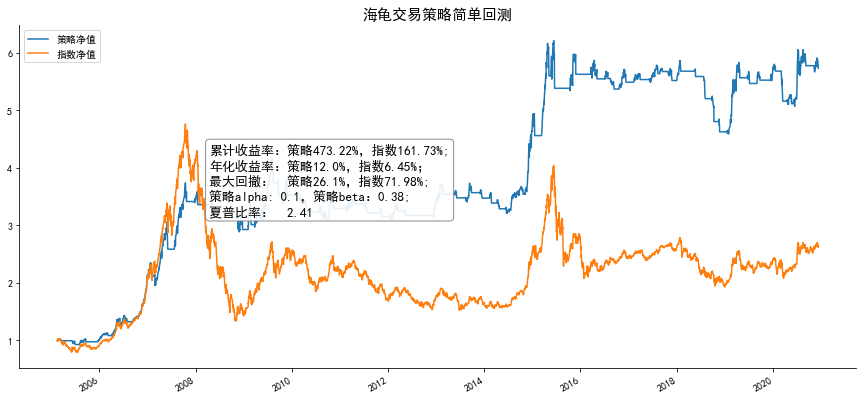

In [18]:
strategy('上证综指','20050101','')

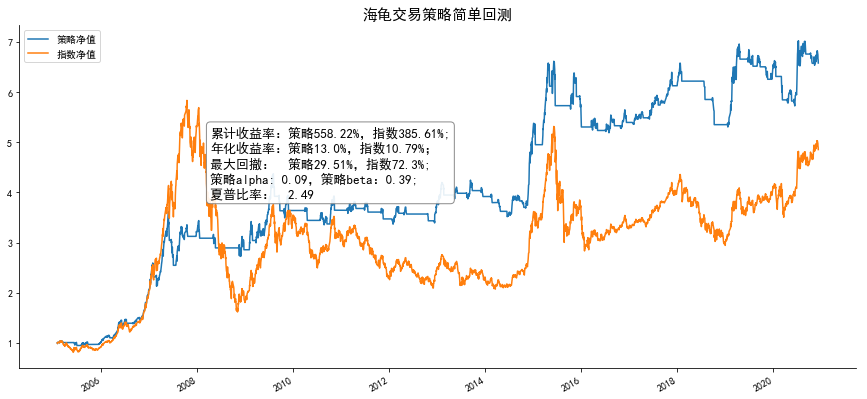

In [79]:
strategy('沪深300','','')

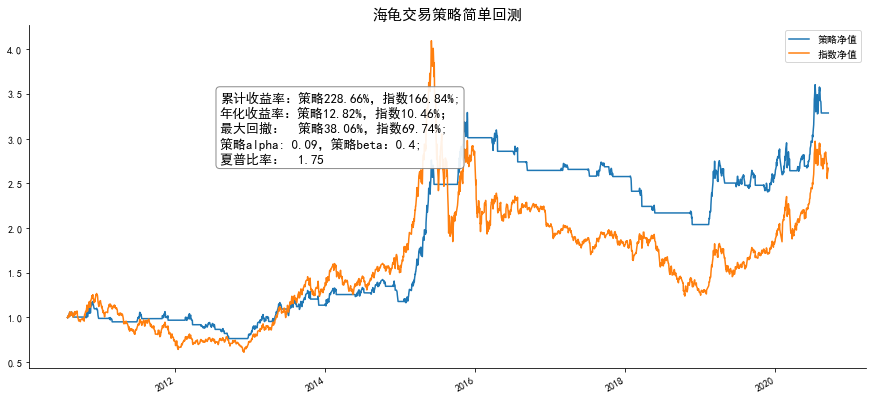

In [19]:
strategy('创业板指','','')

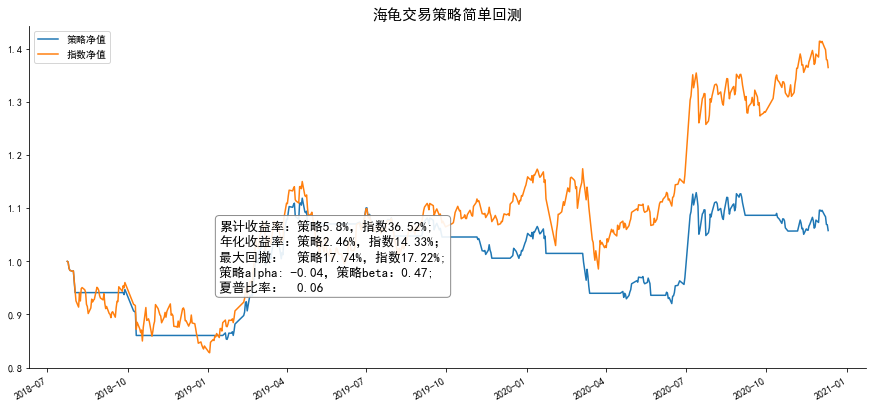

In [32]:
strategy('沪深300','20180101','')

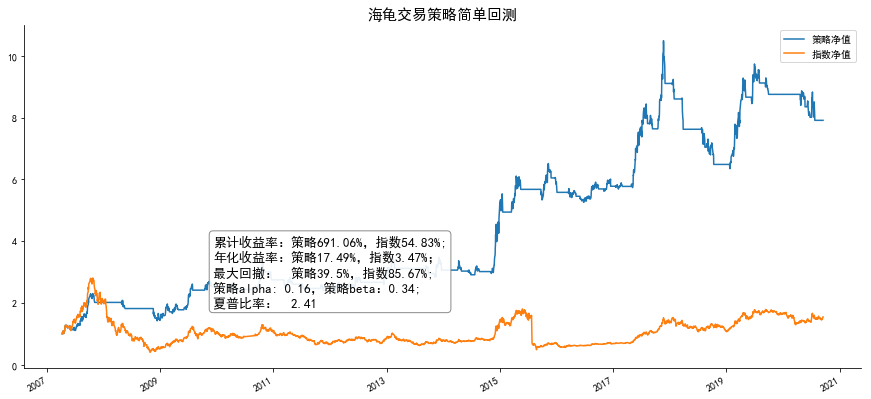

In [20]:
strategy('中国平安','20050101','',N1=20,N2=10)

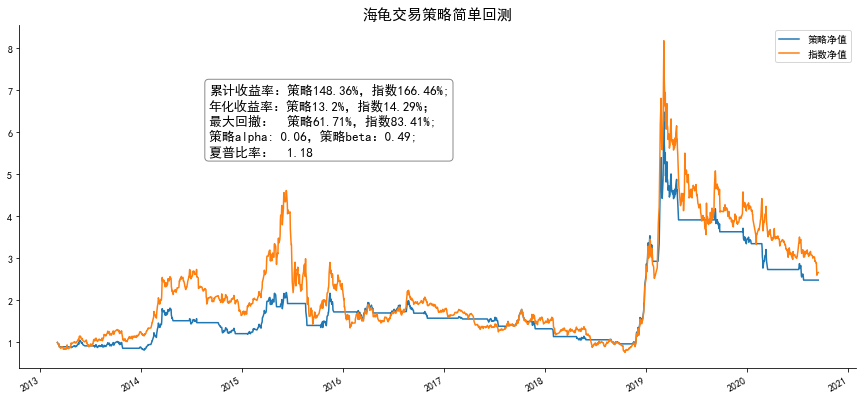

In [21]:
strategy('东方通信','20130101','',N1=20,N2=10)